In [1]:
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score



ModuleNotFoundError: No module named 'sklearn'

In [2]:

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from keras.preprocessing import text, sequence

import nltk
import re
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [3]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [4]:
##TODO

csv_file = 'Final_data\liwc_response_train.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_train_data'
Train_df = pd.read_csv(csv_file)
Train_df = Train_df.loc[:, ~Train_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Train_df.head(5)

#These are the most useful features per SHAP 


##ALL

##Top few
#Train_df_select = Train_df[['vader_compound', 'context0_sentiment', 'word_density','posemo','work','cos_sim1','you','ppron','Response_emotion','ipron','vader_neu','cos_sim','punctuation_count','char_count','negemo','noun_count_percent']].copy()
Train_df_select = Train_df[['vader_compound', 'valence_response', 'time','word_density','noun_count_percent','dominance_response','you','upper_case_word_count','adj_count_percent','char_count','vader_neu','arousal_response','funct','pro_count_percent','Response_emotion','ppron','relativ','adv_count_percent']]

In [5]:
##TODO

csv_file = 'Final_data\liwc_response_test.csv'
#csv_file = '/Users/swcam/Documents/GitHub/Sarcasm/Final_Features_test_data'
Test_df = pd.read_csv(csv_file)
Test_df = Test_df.loc[:, ~Test_df.columns.str.contains('^Unnamed')]
# print out the first few rows of data info
Test_df.head(5)

# These are the most useful features per SHAP
#ALL
Test_df_select = Test_df[['vader_compound', 'valence_response', 'time','word_density','noun_count_percent','dominance_response','you','upper_case_word_count','adj_count_percent','char_count','vader_neu','arousal_response','funct','pro_count_percent','Response_emotion','ppron','relativ','adv_count_percent']]
##Top few
#Test_df_select = Test_df[['vader_compound', 'context0_sentiment', 'word_density','posemo','work','cos_sim1']].copy()

In [6]:
X_train = Train_df_select

X_test= Test_df_select

y_train= Train_df['label']

y_test = Test_df['label']

In [7]:

X_test['Response_emotion'] = X_test['Response_emotion'].astype('category').cat.codes
#X_test['context0_sentiment'] = X_test['context0_sentiment'].astype('category').cat.codes

X_train['Response_emotion'] = X_train['Response_emotion'].astype('category').cat.codes
#X_train['context0_sentiment'] = X_train['context0_sentiment'].astype('category').cat.codes

C:\Users\swcam\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\swcam\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [8]:

from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.fit_transform(y_test)

In [9]:
X_test = X_test.drop(['tokenized_text','label','response'], axis=1)

KeyError: "['tokenized_text' 'label' 'response'] not found in axis"

In [ ]:
X_train = X_train.drop(['tokenized_text','label','response'], axis=1)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_test, y_test, test_size=0.3)

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
# fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)

# predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)

    return metrics.accuracy_score(predictions, y_test),metrics.precision_score(predictions, y_test),metrics.recall_score(predictions, y_test),metrics.f1_score(predictions, y_test)


# Results on Test data

# Naive Bayes


In [13]:
from sklearn.naive_bayes import GaussianNB

accuracy, precision, recall,f1  = train_model(naive_bayes.GaussianNB(), X_train, y_train, X_test)
print ("NB, : ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

NB, :  A: 0.59 P: 0.61 R: 0.59 F1: 0.6


# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
accuracy, precision, recall,fl  = train_model(RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0), X_train, y_train, X_test)
print ("random Forest: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

random Forest:  A: 0.59 P: 0.54 R: 0.6 F1: 0.6


# SVM

In [15]:
from sklearn.svm import SVC

accuracy, precision, recall,f1  = train_model(svm.SVC(), X_train, y_train, X_test)
print ("Svm: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Svm:  A: 0.58 P: 0.42 R: 0.62 F1: 0.5


# LogisticRegression

In [16]:


accuracy, precision, recall,f1  = train_model(LogisticRegression(random_state=0,max_iter=500), X_train, y_train, X_test)
print ("Logistic Regression: ", "A:", round(accuracy,2), "P:", round(precision,2), "R:", round(recall,2), "F1:", round(f1,2))

Logistic Regression:  A: 0.58 P: 0.51 R: 0.6 F1: 0.55


# Test on Train data


C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\swcam\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iteration

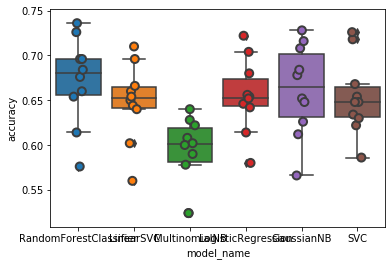

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0,max_iter=500),
    GaussianNB(),
    svm.SVC(),
]
CV = 10
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [21]:
cv_df.groupby('model_name').accuracy.mean()

model_name
GaussianNB                0.6618
LinearSVC                 0.6482
LogisticRegression        0.6550
MultinomialNB             0.5916
RandomForestClassifier    0.6718
SVC                       0.6534
Name: accuracy, dtype: float64

In [22]:
cv_df.groupby('model_name').accuracy.max()

model_name
GaussianNB                0.728
LinearSVC                 0.710
LogisticRegression        0.722
MultinomialNB             0.640
RandomForestClassifier    0.736
SVC                       0.726
Name: accuracy, dtype: float64

In [23]:
cv_df.groupby('model_name').accuracy.min()

model_name
GaussianNB                0.566
LinearSVC                 0.560
LogisticRegression        0.580
MultinomialNB             0.524
RandomForestClassifier    0.576
SVC                       0.586
Name: accuracy, dtype: float64